<a href="https://colab.research.google.com/github/pjwu1997/FinancialEngineering/blob/master/HW3/HW3_Backward_induction_of_option_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import section
from scipy.special import comb
import numpy as np

In [0]:
# Parameters
s = float(input("請輸入現貨價格"))
u = float(input("請輸入二元樹之u"))
d = float(input("請輸入二元樹之d"))
t_terms = float(input("請輸入一期之時間,以年為單位"))
R = np.math.exp(float(input("請輸入年化折現利率"))*t_terms)
p = (R-d)/(u-d)
x = float(input("請輸入履約價"))
n = int(input("請輸入期數"))

請輸入現貨價格160
請輸入二元樹之u1.5
請輸入二元樹之d0.5
請輸入一期之時間,以年為單位1
請輸入年化折現利率0.18232
請輸入履約價150
請輸入期數3


In [0]:
# Call Price
stock_value_tree = np.zeros((n+1,n+1)) # Create data with dimension 2 and n elements for each dimension
stock_value_tree[0][0] = s
for i in range(1,n+1):
    for j in range(i+1):
        if j == i :
            stock_value_tree[i][j] = stock_value_tree[i-1][j-1] * d
        else:
            stock_value_tree[i][j] = stock_value_tree[i-1][j] * u

call_value_tree = np.zeros((n+1,n+1))

for i in range(n+1) :
    for j in range(i+1):
        call_value_tree[i][j] = max(0, stock_value_tree[i][j] - x)

put_value_tree = np.zeros((n+1,n+1))
for i in range(n+1):
    for j in range(i+1):
        put_value_tree[i][j] = max(0, x - stock_value_tree[i][j])

# backward induction on euro call / put
# start from the generation one before the last generation
euro_call_value = 0
euro_put_value = 0

for i in range(n+1):
    euro_call_value += comb(n,i) * p**(n-i) * (1-p)**(i) * call_value_tree[n][i] * R**(-n)
    euro_put_value += comb(n,i) * p**(n-i) * (1-p)**(i) * put_value_tree[n][i] * R**(-n)

ame_call_value_tree = call_value_tree.copy()
ame_put_value_tree = put_value_tree.copy()

#backward induction on american call / put
for i in range(n-1,-1,-1):
    for j in range(i+1):
        #print("(i,j)=("+str(i)+","+str(j)+")")
        ame_call_value_tree[i][j] = max(ame_call_value_tree[i][j], (p*ame_call_value_tree[i+1][j]+(1-p)*ame_call_value_tree[i+1][j+1])/R)
        ame_put_value_tree[i][j] = max(ame_put_value_tree[i][j], (p*ame_put_value_tree[i+1][j]+(1-p)*ame_put_value_tree[i+1][j+1])/R)

ame_call_value = ame_call_value_tree[0][0]
ame_put_value = ame_put_value_tree[0][0]

In [0]:
print("euro_call_value=",euro_call_value)
print("american_call_value=",ame_call_value)
print("euro_put_value=",euro_put_value)
print("american_put_value=",ame_put_value)

euro_call_value= 85.06922876361152
american_call_value= 85.06922876361149
euro_put_value= 11.875189735206163
american_put_value= 21.87516540944857


In [0]:
ame_call_value_tree

array([[ 85.06922876,   0.        ,   0.        ,   0.        ],
       [141.45809657,  10.20831063,   0.        ,   0.        ],
       [234.9998054 ,  17.49998054,   0.        ,   0.        ],
       [390.        ,  30.        ,   0.        ,   0.        ]])

In [0]:
ame_put_value_tree

array([[ 21.87516541,   0.        ,   0.        ,   0.        ],
       [  7.50005838,  70.        ,   0.        ,   0.        ],
       [  0.        ,  30.        , 110.        ,   0.        ],
       [  0.        ,   0.        ,  90.        , 130.        ]])

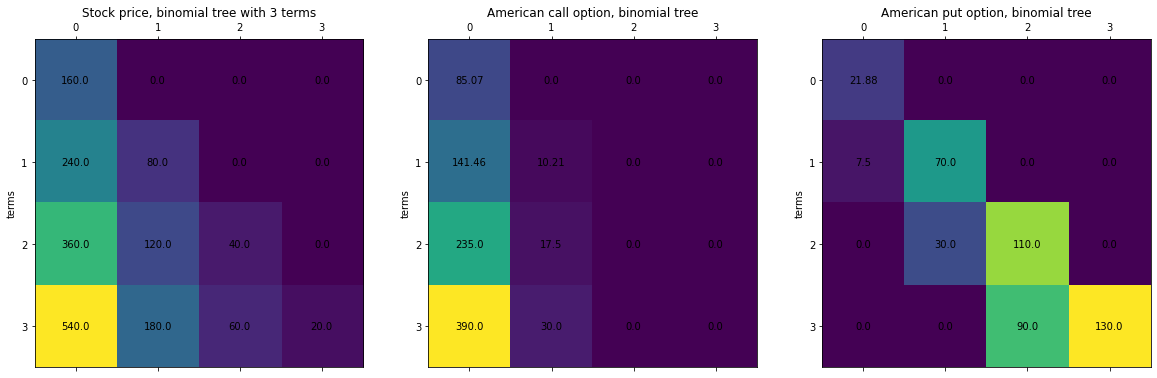

In [0]:
# print the binomial tree
import matplotlib.pyplot as plt
plt.figure(1,figsize=(20,30))
ax1 = plt.subplot(1,3,1)
ax1.matshow(stock_value_tree)
ax1.set_title("Stock price, binomial tree with 3 terms")
ax1.set_ylabel("terms")
for i in range(len(stock_value_tree)):
    for j in range(len(stock_value_tree)):
        text = ax1.text(j,i,round(stock_value_tree[i][j],2),ha='center',va='center')

ax2 = plt.subplot(1,3,2)
ax2.matshow(ame_call_value_tree)
ax2.set_title("American call option, binomial tree")
ax2.set_ylabel("terms")
ax2.matshow(ame_call_value_tree)
for i in range(len(ame_call_value_tree)):
    for j in range(len(ame_call_value_tree)):
        text = ax2.text(j,i,round(ame_call_value_tree[i][j],2),ha='center',va='center')

ax3 = plt.subplot(1,3,3)
ax3.set_title("American put option, binomial tree")
ax3.matshow(ame_put_value_tree)
ax3.set_ylabel("terms")
for i in range(len(ame_put_value_tree)):
    for j in range(len(ame_put_value_tree)):
        text = ax3.text(j,i,round(ame_put_value_tree[i][j],2),ha='center',va='center')

  

計算選擇權之時間價值,最短期之選擇權之期數1
最長期之選擇權之期數100


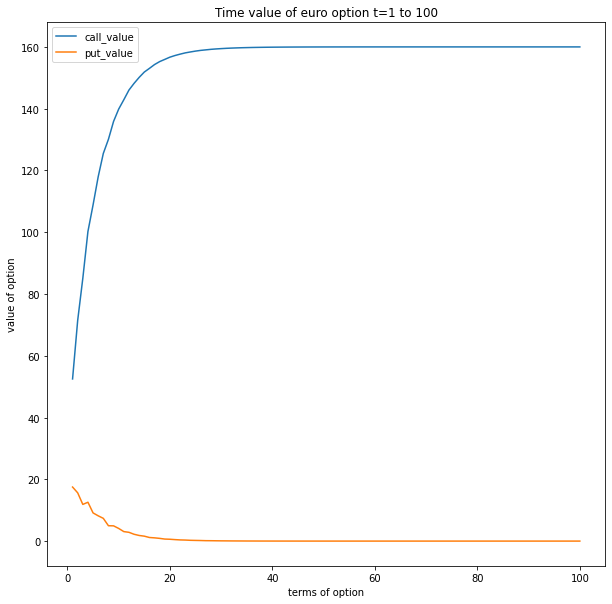

In [0]:
# 選擇權的時間價值,考慮多期之選擇權,以歐式選擇權為例子
def calculate_euro_option(s,n,R,x,u,d):
    stock_value_tree = np.zeros((n+1,n+1)) # Create data with dimension 2 and n elements for each dimension
    stock_value_tree[0][0] = s
    for i in range(1,n+1):
        for j in range(i+1):
            if j == i :
                stock_value_tree[i][j] = stock_value_tree[i-1][j-1] * d
            else:
                stock_value_tree[i][j] = stock_value_tree[i-1][j] * u
    call_value_tree = np.zeros((n+1,n+1))
    
    for i in range(n+1) :
        for j in range(i+1):
            call_value_tree[i][j] = max(0, stock_value_tree[i][j] - x)
    put_value_tree = np.zeros((n+1,n+1))
    
    for i in range(n+1):
        for j in range(i+1):
            put_value_tree[i][j] = max(0, x - stock_value_tree[i][j])
    # backward induction on euro call / put
    # start from the generation one before the last generation
    euro_call_value = 0
    euro_put_value = 0
    
    for i in range(n+1):
        euro_call_value += comb(n,i) * p**(n-i) * (1-p)**(i) * call_value_tree[n][i] * R**(-n)
        euro_put_value += comb(n,i) * p**(n-i) * (1-p)**(i) * put_value_tree[n][i] * R**(-n)
    
    return euro_call_value,euro_put_value

euro_call_value_lst = []
euro_put_value_lst = []

start = int(input("計算選擇權之時間價值,最短期之選擇權之期數"))
end = int(input("最長期之選擇權之期數"))
for i in range(start,end+1):
    call_price, put_price = calculate_euro_option(s,i,R,x,u,d)
    euro_call_value_lst.append(call_price)
    euro_put_value_lst.append(put_price)
time_lst = np.arange(start,end+1)
plt.figure(2,figsize=(10,10))
plt.title("Time value of euro option t="+str(start)+" to "+str(end))
plt.xlabel("terms of option")
plt.ylabel("value of option")
plt.plot(time_lst , euro_call_value_lst, label = 'call_value')
plt.plot(time_lst, euro_put_value_lst, label = "put_value")
plt.legend()


In [0]:
3